# Practical 1: Up and Running Fast

This first practical is designed to give you a quick introduction to the set-up of our practicals. It will use a few, small spatial datasets to show what is possible in just a few short lines of Python code. It's also designed to do a "shake down" of the system and make sure your environments and data paths are all working correctly. 

There will be less of an emphasis on the details of the code during this practical, but we will revisit some of these steps later in the workshop when we talk about spatial operations and analysis techniques.

## Import the core packages

In [1]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

## Load a sample dataset provided by GeoPandas

In [2]:
# if you have GeoPandas installed correctly, this should load without error
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))

In [3]:
# examine the data - this a special type of Dataframe
type(nyc)

geopandas.geodataframe.GeoDataFrame

In [4]:
# examine the initial table of data
nyc.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [5]:
# the spatial projection information
# we have a whole practical on this, so for now just understand that a crs attribute exists
nyc.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

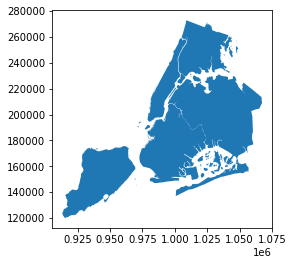

In [6]:
# examine a basic plot of the shapes
nyc.plot()  # one line to make a simple map!

### What is visible in these outputs?

We started off with what, at first, looks and feels like a normal `DataFrame` - a table of data with observations in the rows and different types of values in the columns. We can see, however, that we have a slightly different kind of `DataFrame` now. This is a GeoPandas `GeoDataFrame` with a few added, important **attributes**. It has all the functionality of a `pandas` DataFrame and extends it in a few new ways. The most notable extension is by adding a column called **'geometry'**.

As we just saw, we can make a quick plot of that geometry information with `.plot()`. 

## Improving the map

Let's now take a few steps to enhance that simple plot and see what else we can do with with map of NYC.

The code below will download a few tiles from internet, so it may take a couple moments to load.

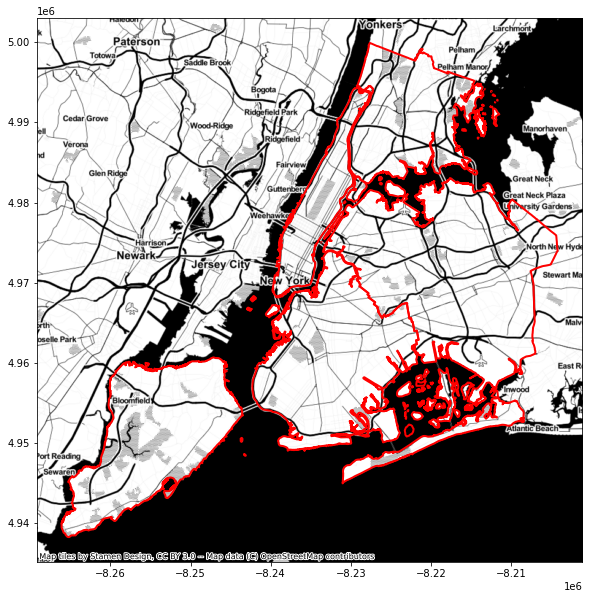

In [7]:
# reproject to align with tiles
# we will return and explain this in another practical
nyc_merc = nyc.to_crs(epsg=3857)

# create the axis object and start a plot
ax = nyc_merc.plot(color='None', 
                   edgecolor='red',
                   linewidth=2,
                   figsize=(10,10))
# add basemap imagery
ctx.add_basemap(ax,
                source=ctx.providers.Stamen.Toner)

This is an example of a relatively simple and quick map that can be produced. We **overlayed** a set of polygon data on top of tiles of a pre-made basemap which gives a nice background and context for our data.

## Recap and Summary
What did we find?

* introduced the core data structure that we will use (**GeoDataFrame**)
* saw how to access some of the key attributes of data and make a simple plot
* improved our plotting with just a few more lines of code and using the `contextily` package

We're going to explore these basic steps in the next practicals and work towards supporting you to analyse your own datasets.